In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [28]:
# Importing the part df
"""
date_parser = pd.datetools.to_datetime
headers = ['ID', 'Country', 'Carrier', 'TrafficType', 'ClickDate', 'Device', 'Browser', 'OS', 
          'RefererUrl', 'UserIp', 'ConversionStatus', 'ConversionDate', 'ConversionPayOut', 
           'publisherId', 'subPublisherId', 'advertiserCampaignId', 'Fraud']
dtypes = {'col1': 'str', 'col2': 'str', 'col3': 'str', 'col4': 'float'}
parse_dates = ['ClickDate']



n = sum(1 for line in open(filename)) - 1 #number of records in file (excludes header)
s = 10000 #desired sample size
skip = sorted(random.sample(range(1,n+1),n-s)) #the 0-indexed header will not be included in the skip list
"""
filename = "train.csv"
PartTrndf = pd.read_csv(filename, nrows=2000)

In [29]:
PartTrndf.shape

(2000, 17)

In [30]:
All_y = PartTrndf[['ConversionStatus','ConversionDate','ConversionPayOut']]

In [31]:
# Checking for the ratio of missing value in y
y_na = (All_y.isnull().sum() / len(All_y)) * 100
y_na = y_na.drop(y_na[y_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :y_na})
missing_data.head()
# Since we are not sure how the conversion Date will be useful we will look at it later

,Missing Ratio
ConversionDate,99.9


In [32]:
PartTrndf.Fraud.value_counts()
# this indicates in the complete sample that we have taken there are Fraud variable set to 1.0

0.0    2000
Name: Fraud, dtype: int64

In [33]:
# Removing the variables that are part of Y and the variables that we wil not be using
del PartTrndf['ConversionStatus'], PartTrndf['ConversionDate'], PartTrndf['ConversionPayOut'], PartTrndf['subPublisherId'], PartTrndf['RefererUrl'], PartTrndf['Device'], PartTrndf['UserIp'], PartTrndf['OS']

In [34]:
PartTrndf.shape

(2000, 9)

In [35]:
PartTrndf.head()

,ID,Country,Carrier,TrafficType,ClickDate,Browser,publisherId,advertiserCampaignId,Fraud
0,0,IN,2.0,M,2017-08-21 00:00:01,chrome,69,6555.0,0.0
1,1,TH,27.0,A,2017-08-21 00:00:01,46.0.2490.76,646,7510.0,0.0
2,2,IN,4.0,M,2017-08-21 00:00:01,chromium,301,12696.0,0.0
3,3,PH,-1.0,A,2017-08-21 00:00:01,android_webkit,242,735.0,0.0
4,4,MX,-1.0,NaN,2017-08-21 00:00:01,chrome,1306,7802.0,0.0


In [36]:
# Checking for the ratio of missing value
PartTrndf_na = (PartTrndf.isnull().sum() / len(PartTrndf)) * 100
PartTrndf_na = PartTrndf_na.drop(PartTrndf_na[PartTrndf_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :PartTrndf_na})
missing_data.head(20)

,Missing Ratio
TrafficType,12.45
Browser,0.40
Country,0.30


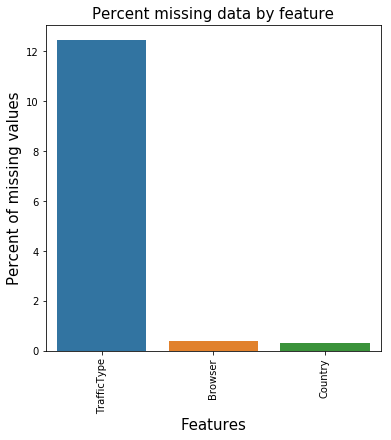

In [37]:
f, ax = plt.subplots(figsize=(6, 6))
plt.xticks(rotation='90')
sns.barplot(x=PartTrndf_na.index, y=PartTrndf_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
plt.show()

In [38]:
# Replace the Missing value
PartTrndf['TrafficType'] = PartTrndf.TrafficType.fillna('UN')
PartTrndf['Country'] = PartTrndf.Country.fillna('UN')
PartTrndf['Browser'] = PartTrndf.Browser.fillna('UN')
#dropped OS since it is very similar PartTrndf['OS'] = PartTrndf.OS.fillna('UN')

In [39]:
# Checking for the missing value details after the replacement
# Checking for the ratio of missing value
PartTrndf_na = (PartTrndf.isnull().sum() / len(PartTrndf)) * 100
PartTrndf_na = PartTrndf_na.drop(PartTrndf_na[PartTrndf_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :PartTrndf_na})
missing_data.head(20)

,Missing Ratio


In [40]:
# Handing the ClickDate field as a Date
PartTrndf['ClickDate'] = pd.to_datetime(PartTrndf['ClickDate'])

In [41]:
# Feature Enginerring to Create New variables for Day of Week and Day part
PartTrndf['Weekday'] = (PartTrndf['ClickDate'].dt.dayofweek).astype(int)
PartTrndf['Dayhour'] = (PartTrndf.ClickDate.apply(lambda x: x.hour)).astype(int)

In [42]:
# To remove Ordinality in both Weekday and DayHour variables convert into Categories
PartTrndf['Weekday'] = PartTrndf['Weekday'].map( {0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed',
                                                  4: 'Thr', 5: 'Fri', 6: 'Sat'} ).astype(str)
PartTrndf['Dayhour'] = PartTrndf['Dayhour'].map( {0: 'PrAM', 1: 'PrAM', 2: 'PrAM', 3: 'PrAM', 
                                                  4: 'PrAM', 5: 'PrAM', 6: 'AM', 7: 'AM', 8: 'AM', 9: 'AM', 
                                                  10: 'AM', 11: 'AM', 12: 'PM', 13: 'PM', 14: 'PM', 15: 'PM', 
                                                  16: 'PM', 17: 'PM', 18: 'PM', 19: 'PoPM', 20: 'PoPM', 
                                                  21: 'PoPM', 22: 'PoPM', 23: 'PoPM',} ).astype(str)
# Delete the Click Date varaible
del PartTrndf['ClickDate']

In [43]:
PartTrndf.head()

,ID,Country,Carrier,TrafficType,Browser,publisherId,advertiserCampaignId,Fraud,Weekday,Dayhour
0,0,IN,2.0,M,chrome,69,6555.0,0.0,Sun,PrAM
1,1,TH,27.0,A,46.0.2490.76,646,7510.0,0.0,Sun,PrAM
2,2,IN,4.0,M,chromium,301,12696.0,0.0,Sun,PrAM
3,3,PH,-1.0,A,android_webkit,242,735.0,0.0,Sun,PrAM
4,4,MX,-1.0,UN,chrome,1306,7802.0,0.0,Sun,PrAM


In [44]:
# Convert TrafficType, Browser, OS, Weekday, Dayhour into Numerical
PartTrndf = pd.get_dummies(PartTrndf, columns=['Country', 'Carrier','TrafficType', 'Browser', 'publisherId', 
                                               'advertiserCampaignId','Fraud','Weekday','Dayhour'], drop_first=True)

In [45]:
PartTrndf.head()

,ID,Country_AE,Country_AR,Country_AT,Country_AZ,Country_BD,Country_BG,Country_BH,Country_BO,Country_BR,...,advertiserCampaignId_16216.0,advertiserCampaignId_16230.0,advertiserCampaignId_16240.0,advertiserCampaignId_16327.0,advertiserCampaignId_16367.0,advertiserCampaignId_16458.0,advertiserCampaignId_16603.0,advertiserCampaignId_16649.0,advertiserCampaignId_16769.0,advertiserCampaignId_16799.0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
PartTrndf.shape

(2000, 506)

In [47]:
# Creating y
y = All_y['ConversionStatus'].as_matrix().astype(np.int)

In [48]:
# creating X
del PartTrndf['ID']
X = PartTrndf.as_matrix().astype(np.int)
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [49]:
print ('The shape of X is:',X.shape, 'The shape of y is', y.shape)

The shape of X is: (2000, 505) The shape of y is (2000,)


In [50]:
#Cross Validation
from sklearn import model_selection
stratified_k_fold = model_selection.StratifiedKFold(n_splits=5, shuffle=True)
print (stratified_k_fold)

StratifiedKFold(n_splits=5, random_state=None, shuffle=True)


In [51]:
def stratified_cv(X, y, clf_class, shuffle=True, n_folds=5, **kwargs):
    stratified_k_fold = model_selection.StratifiedKFold(n_splits=n_folds, shuffle=shuffle)
    y_pred = y.copy()
    for i, j in stratified_k_fold.split(X, y):
        X_train, X_test = X[i], X[j]
        y_train = y[i]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[j] = clf.predict(X_test)
    return y_pred

In [52]:
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import metrics
from sklearn import linear_model

print('Gradient Boosting Classifier:  {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, ensemble.GradientBoostingClassifier))))

/Users/viswanathravindran/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:597: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Gradient Boosting Classifier:  1.00


In [53]:
print('Random Forest Classifier:      {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, ensemble.RandomForestClassifier))))


/Users/viswanathravindran/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:597: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Random Forest Classifier:      1.00


In [54]:
print('Support vector machine(SVM):   {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, svm.SVC))))

Support vector machine(SVM):   1.00


/Users/viswanathravindran/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:597: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [55]:
print('K Nearest Neighbor Classifier: {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, neighbors.KNeighborsClassifier))))

/Users/viswanathravindran/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:597: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


K Nearest Neighbor Classifier: 1.00


In [56]:
from sklearn import linear_model

grad_ens_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, ensemble.GradientBoostingClassifier))
decision_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, tree.DecisionTreeClassifier))
ridge_clf_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, linear_model.RidgeClassifier))
svm_svc_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, svm.SVC))
random_forest_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, ensemble.RandomForestClassifier))
k_neighbors_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, neighbors.KNeighborsClassifier))

conf_matrix = {
                1: {
                    'matrix': grad_ens_conf_matrix,
                    'title': 'Gradient Boosting',
                   },
                2: {
                    'matrix': decision_conf_matrix,
                    'title': 'Decision Tree',
                   },
                3: {
                    'matrix': ridge_clf_conf_matrix,
                    'title': 'Ridge',
                   },
                4: {
                    'matrix': svm_svc_conf_matrix,
                    'title': 'Support Vector Machine',
                   },
                5: {
                    'matrix': random_forest_conf_matrix,
                    'title': 'Random Forest',
                   },
                6: {
                    'matrix': k_neighbors_conf_matrix,
                    'title': 'K Nearest Neighbors',
                   },
}

/Users/viswanathravindran/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:597: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/Users/viswanathravindran/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:597: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


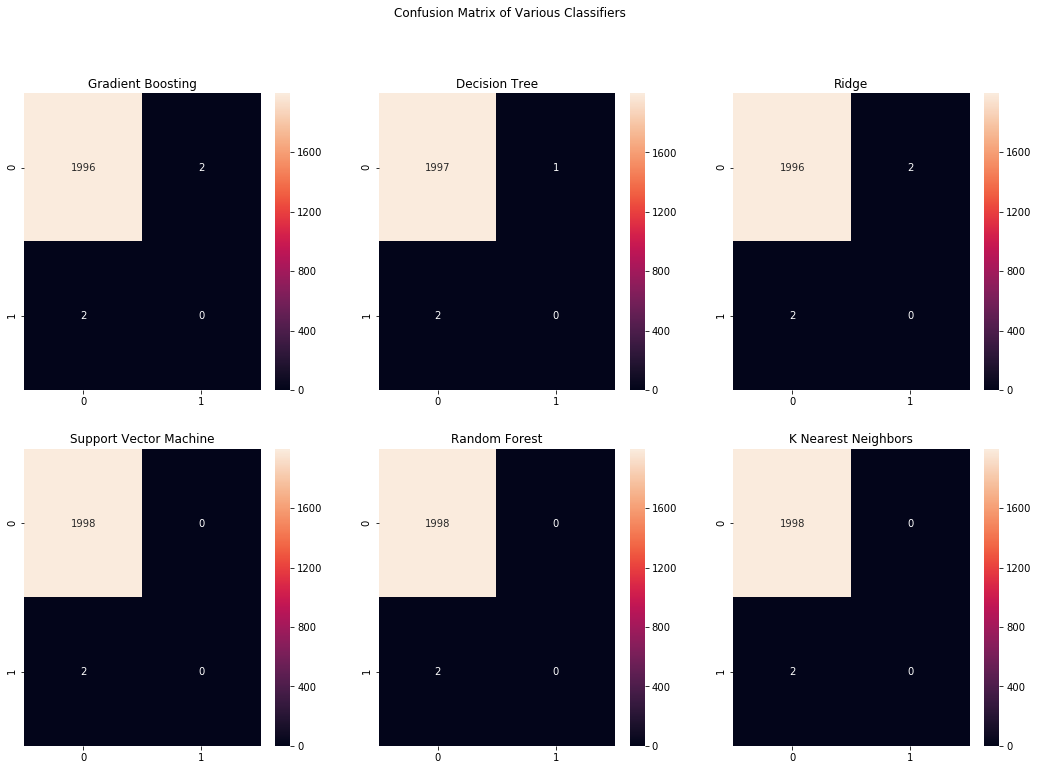

In [59]:
fig, ax = plt.subplots(figsize=(18, 12))
plt.suptitle('Confusion Matrix of Various Classifiers')
for ii, values in conf_matrix.items():
    matrix = values['matrix']
    title = values['title']
    plt.subplot(2, 3, ii) # starts from 1
    plt.title(title);
    sns.heatmap(matrix, annot=True,  fmt='');
plt.show()

In [60]:
# Accuracy vs Precision vs Recall vs F1-score
print('Ridge Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, linear_model.RidgeClassifier))))
print('Gradient Boosting Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, ensemble.GradientBoostingClassifier))))
print('Support vector machine(SVM):\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, svm.SVC))))
print('Random Forest Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, ensemble.RandomForestClassifier))))
print('K-Nearest Neighbor Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, neighbors.KNeighborsClassifier))))

/Users/viswanathravindran/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:597: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/Users/viswanathravindran/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Ridge Classifier:
              precision    recall  f1-score   support

          0       1.00      1.00      1.00      1998
          1       0.00      0.00      0.00         2

avg / total       1.00      1.00      1.00      2000


Gradient Boosting Classifier:
              precision    recall  f1-score   support

          0       1.00      1.00      1.00      1998
          1       0.00      0.00      0.00         2

avg / total       1.00      1.00      1.00      2000


Support vector machine(SVM):
              precision    recall  f1-score   support

          0       1.00      1.00      1.00      1998
          1       0.00      0.00      0.00         2

avg / total       1.00      1.00      1.00      2000


Random Forest Classifier:
              precision    recall  f1-score   support

          0       1.00      1.00      1.00      1998
          1       0.00      0.00      0.00         2

avg / total       1.00      1.00      1.00      2000




/Users/viswanathravindran/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:597: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


K-Nearest Neighbor Classifier:
              precision    recall  f1-score   support

          0       1.00      1.00      1.00      1998
          1       0.00      0.00      0.00         2

avg / total       1.00      1.00      1.00      2000




/Users/viswanathravindran/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [61]:
gbc = ensemble.GradientBoostingClassifier()
gbc.fit(X, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

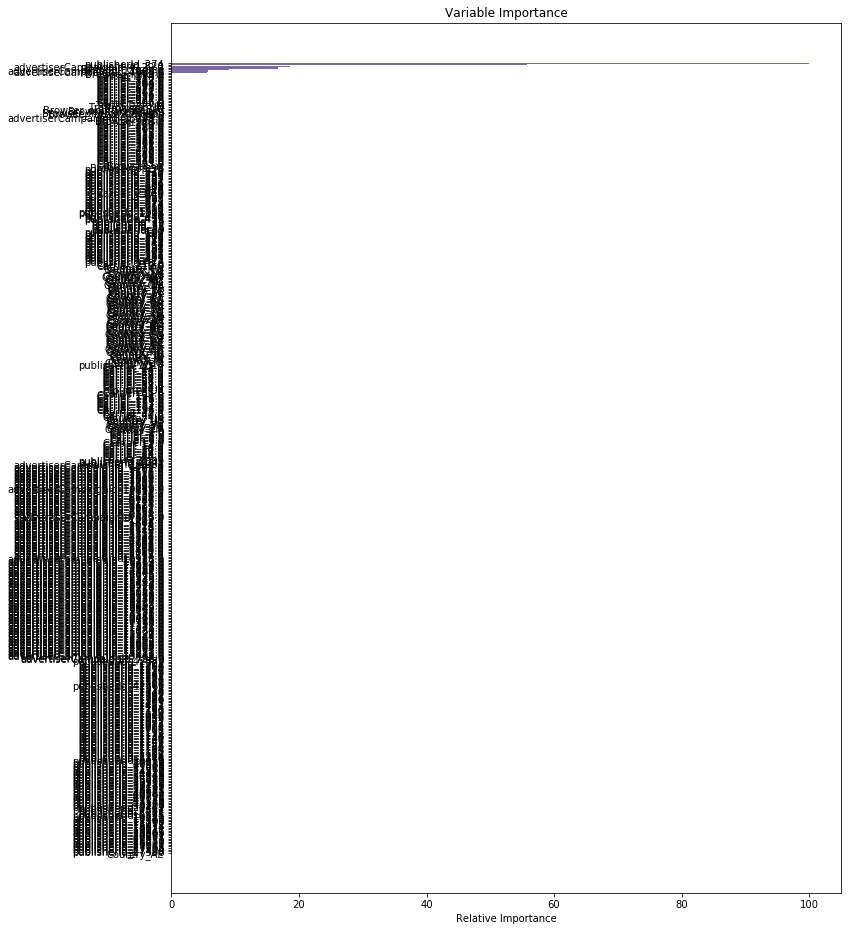

In [65]:
# Get Feature Importance from the classifier
feature_importance = gbc.feature_importances_
# Normalize The Features
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12, 16))
plt.barh(pos, feature_importance[sorted_idx], align='center', color='#7A68A6')
plt.yticks(pos, np.asanyarray(PartTrndf.columns.tolist())[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [66]:
# Split training into Train and test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
import time
from sklearn import grid_search

param_grid = {
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 6],
              'min_samples_leaf': [1, 2, 3, 4, 9, 15],
              'n_estimators': [1000, 2000, 3000],
              }

est = ensemble.GradientBoostingClassifier()

start_time = time.time()
# run randomized search
n_iter_search = 20
randomized_search = grid_search.RandomizedSearchCV(est, param_distributions=param_grid,
    n_iter=n_iter_search, n_jobs=4).fit(X_train, y_train)

gs_cv = grid_search.GridSearchCV(est, param_grid, n_jobs=4).fit(X_train, y_train)
end_time = time.time()

print('It took {} seconds'.format(end_time - start_time))

/Users/viswanathravindran/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/viswanathravindran/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/viswanathravindran/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:553: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of labels for any class cannot be less th

In [ ]:
print ('The best parameters after random search is', randomized_search.best_params_)
print ('The best score is after random search is', randomized_search.best_score_)